In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
#1
from keras.datasets import cifar10

In [3]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [4]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [5]:
x_train=x_train.astype('float64')/255
x_test=x_test.astype('float64')/255

In [6]:
x_train.dtype

dtype('float64')

In [7]:
print(y_train.shape)
print(y_test.shape)

(50000, 1)
(10000, 1)


In [8]:
from keras.utils import np_utils
from keras.utils import to_categorical

In [10]:
num_classes= len(np.unique(y_train))
num_classes

10

In [11]:
print(y_train)
len(y_train)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


50000

In [12]:
y_train= to_categorical(y_train,num_classes)
y_test=to_categorical(y_test,num_classes)


In [13]:
(y_train, y_valid) = y_train[5000:], y_train[:5000]
(x_train, x_valid) = x_train[5000:], x_train[:5000]

In [14]:
print(y_train.shape)
print(x_train.shape)

(45000, 10)
(45000, 32, 32, 3)


In [15]:
print(y_valid.shape)
print(x_valid.shape)


(5000, 10)
(5000, 32, 32, 3)


In [16]:
##2
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense



In [17]:
model=Sequential()

In [18]:
model.add(Conv2D(filters=16,kernel_size=3,activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=2))

In [19]:

model.add(Conv2D(filters=16,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2))



In [20]:
model.add(Conv2D(filters=16,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 16)          2320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 16)         0

In [22]:
model.add(Flatten())

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 16)          2320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 16)         0

In [24]:
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))

In [25]:
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))

In [26]:
model.add(Dense(units=10,activation='softmax',kernel_initializer='uniform'))

In [27]:
model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 16)          2320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 16)         0

In [29]:
answers=model.fit(x_train,y_train,validation_data=(x_valid,y_valid),shuffle=True,epochs=10,verbose=2,batch_size=500)

Epoch 1/10
90/90 - 41s - loss: 2.0784 - accuracy: 0.1698 - val_loss: 1.9344 - val_accuracy: 0.1874 - 41s/epoch - 455ms/step
Epoch 2/10
90/90 - 50s - loss: 1.8587 - accuracy: 0.2568 - val_loss: 1.7806 - val_accuracy: 0.2864 - 50s/epoch - 557ms/step
Epoch 3/10
90/90 - 53s - loss: 1.7060 - accuracy: 0.3271 - val_loss: 1.6441 - val_accuracy: 0.3518 - 53s/epoch - 590ms/step
Epoch 4/10
90/90 - 51s - loss: 1.6297 - accuracy: 0.3738 - val_loss: 1.5694 - val_accuracy: 0.4028 - 51s/epoch - 572ms/step
Epoch 5/10
90/90 - 46s - loss: 1.5395 - accuracy: 0.4122 - val_loss: 1.5112 - val_accuracy: 0.4280 - 46s/epoch - 512ms/step
Epoch 6/10
90/90 - 37s - loss: 1.4770 - accuracy: 0.4440 - val_loss: 1.4760 - val_accuracy: 0.4480 - 37s/epoch - 410ms/step
Epoch 7/10
90/90 - 38s - loss: 1.4227 - accuracy: 0.4733 - val_loss: 1.4055 - val_accuracy: 0.4802 - 38s/epoch - 423ms/step
Epoch 8/10
90/90 - 37s - loss: 1.3761 - accuracy: 0.4950 - val_loss: 1.3979 - val_accuracy: 0.4932 - 37s/epoch - 417ms/step
Epoch 9/

In [30]:
##3
results=model.evaluate(x_test,y_test)
results


313/313 [==============================] - 4s 11ms/step - loss: 1.3941 - accuracy: 0.4951


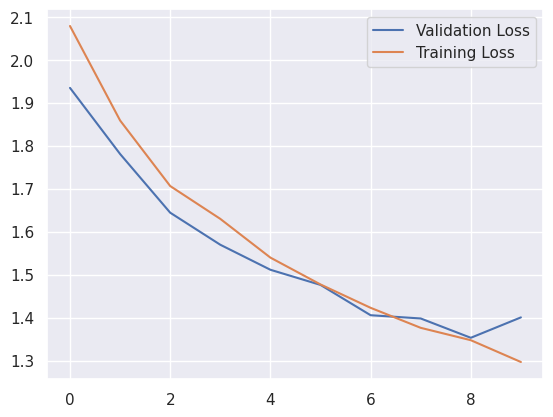

In [34]:
plt.plot(answers.history["val_loss"],label="Validation Loss")
plt.plot(answers.history["loss"],label="Training Loss")
plt.legend()

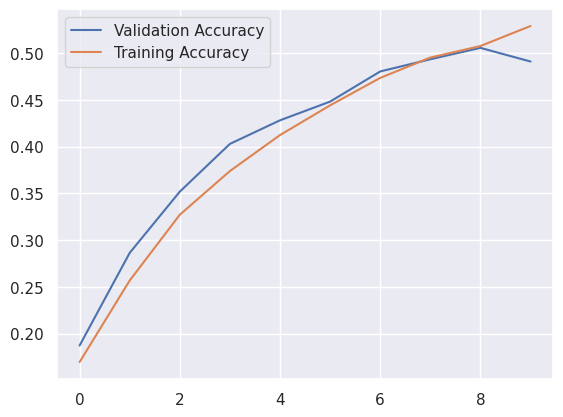

In [35]:
plt.plot(answers.history['val_accuracy'],label='Validation Accuracy')
plt.plot(answers.history['accuracy'],label='Training Accuracy')
plt.legend()